<br>

# ev-MOGA example 1

2 objectives

<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

import time

In [2]:
import evmoga as ev
from evmoga import utilities as evu

import user_functions as uf

ev-MOGA package initialized.


Description and other information about the data:

In [3]:
description = "Example 1"
objectives = ["J1", "J2"]
signs = [+1, +1] # -1: maximize, +1: minimize

Options:

In [4]:
save_results = True
mat_folder = "./mat_files/"
mat_filename = mat_folder + "evMOGApy_example1.mat" 

## Setting-up and running ev-MOGA

In [5]:
n_obj = 2 # Number of objectives
n_var = 2 # Number of decision variables

eMOGA = {
    
    'description': description,
    'objectives': objectives,
    
    'objfun': uf.mop31,
    'iterationfun': uf.fun_iteration,
    'resultsfun': uf.fun_results,
    'constraintfun': uf.sat,

    'objfun_dim': n_obj,
    'searchSpace_dim': n_var,
    'searchspaceUB': +np.pi * np.ones(n_var),
    'searchspaceLB': -np.pi * np.ones(n_var),
    
    'Nind_P': int(500),
    'Generations': int(200),    
    # 'Nind_GA': int(200),
    'n_div': [200 for i in range(n_obj)],

    'param': {
        'signs': signs,
    },

    'Nit': 10,
}

eMOGA = ev.MOGA(eMOGA)


--------------------------------------------------------

Initializing ev-MOGA algorithm...

No initial population P(0) found
Generating initial population P(0) with 500 individuals


	100%|██████████|



Final size of P(0): 500 individuals

Estimating value functions of P(0)

Estimating the initial e-Pareto front A(0):
      - Marking non-dominated solutions...
      - Selecting epsilon-non-dominated solutions...


	100%|██████████|


Iterating process searching for e-Pareto front...

Generations: 0 out of 200. Nind_A = 12 (elapsed time: 0.1 s)


Generations: 10 out of 200. Nind_A = 23 (elapsed time: 0.1 s)


Generations: 20 out of 200. Nind_A = 28 (elapsed time: 0.1 s)
Generations: 30 out of 200. Nind_A = 29 (elapsed time: 0.1 s)
Generations: 40 out of 200. Nind_A = 29 (elapsed time: 0.1 s)
Generations: 50 out of 200. Nind_A = 29 (elapsed time: 0.1 s)
Generations: 60 out of 200. Nind_A = 34 (elapsed time: 0.0 s)
Generations: 70 out of 200. Nind_A = 32 (elapsed time: 0.1 s)
Generations: 80 out of 200. Nind_A = 35 (elapsed time: 0.1 s)
Generations: 90 out of 200. Nind_A = 35 (elapsed time: 0.1 s)
Generations: 100 out of 200. Nind_A = 34 (elapsed time: 0.1 s)
Generations: 110 out of 200. Nind_A = 34 (elapsed time: 0.1 s)
Generations: 120 out of 200. Nind_A = 35 (elapsed time: 0.0 s)
Generations: 130 out of 200. Nind_A = 35 (elapsed time: 0.0 s)
Generations: 140 out of 200. Nind_A = 36 (elapsed time: 0.0 s)
Generations: 150 out of 200. Nind_A = 36 (elapsed time: 0.0 s)
Generations: 160 out of 200. Nind_A = 36 (elapsed time: 0.0 s)
Generations: 170 out of 200. Nind_A = 36 (elapsed time: 0.0 s)


## Plotting results

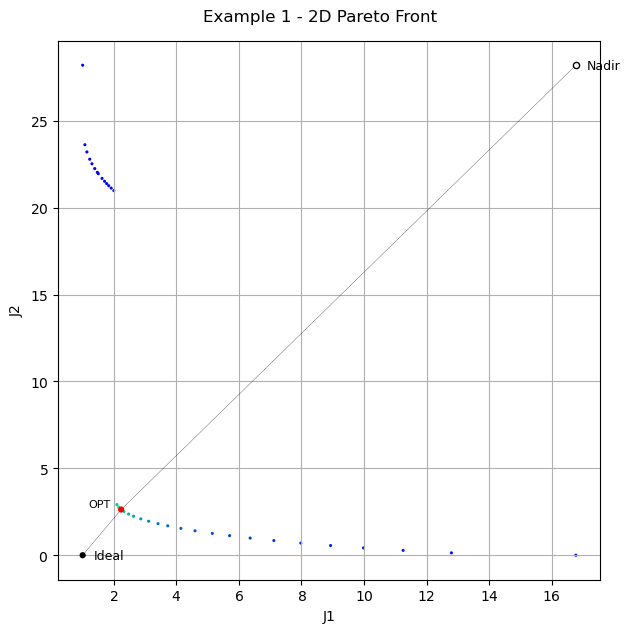

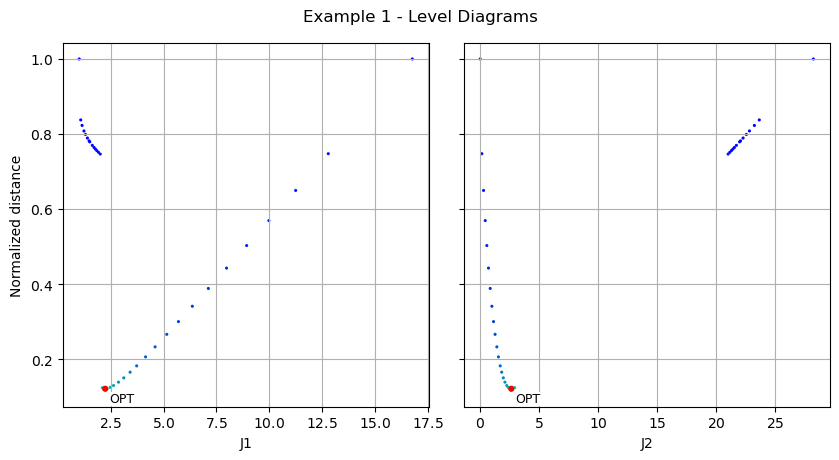

(<Figure size 850x467.5 with 2 Axes>,
 array([<Axes: xlabel='J1', ylabel='Normalized distance'>,
        <Axes: xlabel='J2'>], dtype=object))

In [6]:
dot_size_2D = 20
opt_dot_size_factor_2D = 4

eMOGA['signs'] = np.array(eMOGA['param']['signs'])
cmap = 'winter'

if 'graph options' not in eMOGA:
    eMOGA['graph options'] = dict()
eMOGA['graph options']['obj_ord_2D'] = [0, 1]
eMOGA['graph options']['dot_size_2D'] = dot_size_2D
eMOGA['graph options']['opt_dot_size_factor_2D'] = opt_dot_size_factor_2D

fig = evu.plot_Pareto_Front(eMOGA, plot_optims=True)
evu.plot_Level_Diagrams(eMOGA, plot_params_LD=False)

Comparing with the exact solution:

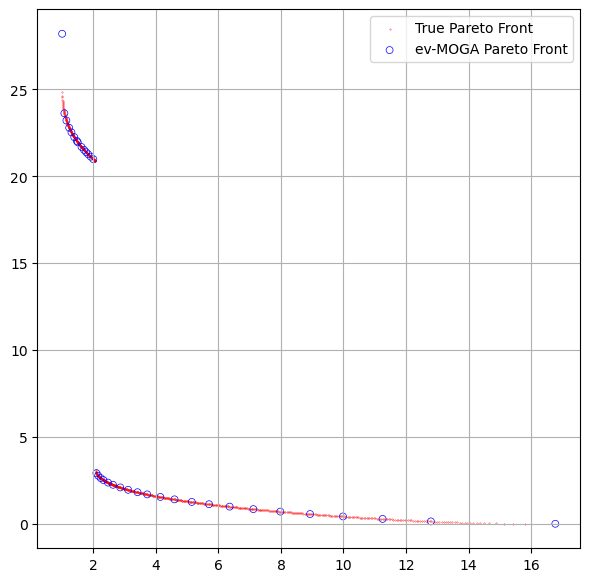

In [7]:
mop3aux = loadmat("./evMOGAtoolbox/evMOGAtoolbox/mop3aux.mat")
pfrontaux = mop3aux['pfront']
pfrontaux = pfrontaux[np.argsort(pfrontaux[:,0])]

fig = plt.figure(figsize=(7, 7))
plt.scatter(pfrontaux[:,0], pfrontaux[:,1],
            marker='.', s=0.25, c='r', 
            label='True Pareto Front')
# plt.plot(pfrontaux[:,0], pfrontaux[:,1],
#             linestyle='-', linewidth=0.5, color='r',
#             label='True Pareto Front')
plt.scatter(eMOGA['coste_A'][:,0], eMOGA['coste_A'][:,1], 
            marker='o', s=25, facecolors='none', edgecolors='b', linewidths=0.5,
            label='ev-MOGA Pareto Front')
plt.legend()
plt.grid()
plt.show()